In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


##Test FA Grid
####By Sergio Daniel Hernandez Charpak

Notebook to try to interact with the Fractional Anisotropy (FA) grid from by the c file. 
Here we read the results and plot them.

In [2]:
def writeFirstLine(filename,line):
    with open(filename,'r+') as f:
        content = f.read()
        f.seek(0,0)
        f.write(line.rstrip('\r\n') + '\n' + content)
def readFirstLine(filename):
    with open(filename, 'r') as f:
        first_line = f.readline()
        return first_line

In [3]:
inputfolder = '../'
inputfile = 'test_1.dat'

First let's read the first line with all the parameters.
Its format is:
long long* n_nodes, long long* n_total_gen, int* n_x_gen, int* n_y_gen, int* n_z_gen, long long* n_nodes_gen, float* dx_gen, float* dy_gen, float* dz_gen, float* x_0_gen, float* y_0_gen, float* z_0_gen

In [4]:
firstline = readFirstLine(inputfolder+inputfile)
firstline = firstline.strip('\n')
firstline_array = firstline.split("\t")

In [5]:
n_nodes = (longlong(firstline_array[0]))
n_total = (longlong(firstline_array[1]))
n_x = (int(firstline_array[2]))
n_y = (int(firstline_array[3]))
n_z = (int(firstline_array[4]))
dx = (float(firstline_array[5]))
dy = (float(firstline_array[6]))
dz = (float(firstline_array[7]))
x_0 = (float(firstline_array[8]))
y_0 = (float(firstline_array[9]))
z_0 = (float(firstline_array[10]))

Now that we know the general parameters of the file we can proceed to read the rest of the file.
First we form the grid.

In [6]:
grid_FA = np.zeros((n_x,n_y,n_z))
print grid_FA.shape

(256, 256, 256)


In [7]:
f = open(inputfolder+inputfile)
count =0
#firstline again. We ignore it
line = f.readline()
#now we proceed to reading the rest
#each line corresponds to a i,j
for i in range (n_x):
    line = f.readline()
    if (line != '\n'):
        for j in range (n_y): 
            line = line.strip('\n')
            line_array = line.split("\t")
            for k in range (n_z):
                grid_FA[i,j,k] = float(line_array[k])
f.close()

In [8]:
max_FA, min_FA = grid_FA.max(), grid_FA.min()
print max_FA, min_FA

74025782764.9 1239887243.98


##Problem
These values are problematic. It seems that the FA isn't normalized.
We normalize but it is very likely the error comes from the C code.

In [9]:
new_grid_FA = grid_FA/max_FA

In [10]:
new_max_FA, new_min_FA = new_grid_FA.max(), new_grid_FA.min()
print new_max_FA, new_min_FA

1.0 0.0167493972731


In [11]:
new_grid_FA_1D = np.zeros(n_nodes)
for i in range (n_x):
    for j in range (n_y): 
        for k in range (n_z):
            new_grid_FA_1D[i + n_x * (j + n_y * k)] = new_grid_FA[i,j,k]

In [12]:
grid_FA_1D = np.zeros(n_nodes)
for i in range (n_x):
    for j in range (n_y): 
        for k in range (n_z):
            grid_FA_1D[i + n_x * (j + n_y * k)] = grid_FA[i,j,k]

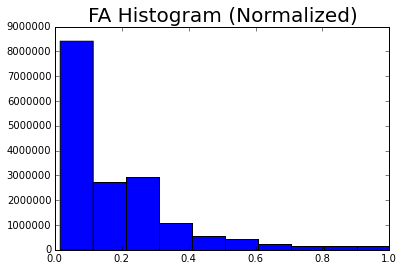

In [14]:
fig = plt.figure()
#binwidth=0.00000001
#plt.hist(new_grid_FA_1D, bins=np.arange(new_min_FA, new_max_FA + binwidth, binwidth))
plt.hist(new_grid_FA_1D)
#plt.xlabel('
plt.title('FA Histogram (Normalized)', fontsize=20)
#plt.close(fig)

In [15]:
plt.close(fig)
print max(new_grid_FA_1D), min(new_grid_FA_1D)

1.0 0.0167493972731


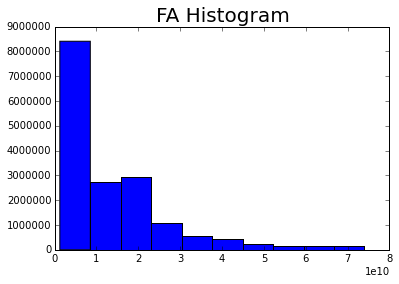

In [16]:
fig = plt.figure()
plt.hist(grid_FA_1D)
#plt.xlabel('
plt.title('FA Histogram', fontsize=20)
#plt.close(fig)

In [17]:
plt.close(fig)

We seem to have two extremes in the calculation of the FA. We definitely need to make sure the C file is correct.